<a href="https://colab.research.google.com/github/bhuvnk/EVA/blob/master/Assignment5/EVA_assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and modules

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

## Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


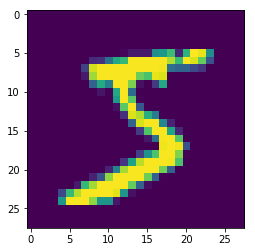

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 0. Default model

In [127]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dropout

model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, 1, activation='relu')) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(10, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5, 5))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_389 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_305 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_390 (Conv2D)          (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_306 (Bat (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_241 (Dropout)        (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_391 (Conv2D)          (None, 22, 22, 12)        1092      
_________________________________________________________________
batch_normalization_307 (Bat (None, 22, 22, 12)        48        
__________

In [128]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          batch_size=64,
          nb_epoch=20,
          verbose=1,
          callbacks=[LearningRateScheduler(lr_schedule, verbose=1)],
          )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 48s 806us/step - loss: 0.3155 - acc: 0.9390 - val_loss: 0.0800 - val_acc: 0.9803
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 15s 258us/step - loss: 0.1012 - acc: 0.9771 - val_loss: 0.0447 - val_acc: 0.9899
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 15s 258us/step - loss: 0.0754 - acc: 0.9814 - val_loss: 0.0379 - val_acc: 0.9896
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 15s 256us/step - loss: 0.0642 - acc: 0.9832 - val_loss: 0.0403 - val_acc: 0.9897
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

# 1: Training with just Image Normalization

In [135]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dropout
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu'))#22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, 1, activation='relu')) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(10, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5, 5))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_413 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_326 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_414 (Conv2D)          (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_327 (Bat (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_256 (Dropout)        (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_415 (Conv2D)          (None, 22, 22, 12)        1092      
_________________________________________________________________
batch_normalization_328 (Bat (None, 22, 22, 12)        48        
__________

In [0]:
#Creating normalized data for train and test
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
datagen.fit(X_train)
datagen.fit(X_test)

train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)


In [137]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.fit_generator(train_iterator,
                    steps_per_epoch=len(train_iterator),
                    epochs=20, verbose=1,
                    validation_data=test_iterator,
                    validation_steps=len(test_iterator),
                    callbacks=[LearningRateScheduler(lr_schedule, verbose=1)],
                   )

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
938/938 [==============================] - 52s 56ms/step - loss: 0.3289 - acc: 0.9334 - val_loss: 0.0911 - val_acc: 0.9784
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
938/938 [==============================] - 17s 19ms/step - loss: 0.1029 - acc: 0.9761 - val_loss: 0.0526 - val_acc: 0.9863
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
938/938 [==============================] - 18s 19ms/step - loss: 0.0772 - acc: 0.9799 - val_loss: 0.0404 - val_acc: 0.9890
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
938/938 [==============================] - 17s 19ms/step - loss: 0.0639 - acc: 0.9829 - val_loss: 0.0337 - val_acc: 0.9905
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
938/938 [==============================] - 17s 19ms/step - loss: 0.0557 - acc: 0.9850

# 2: Image Normalization + ReLU after BN

In [138]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dropout

model = Sequential()
 
model.add(Conv2D(8, (3, 3), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(10, (3, 3))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(12, (3, 3)))#22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(8, (1, 1), activation='relu')) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Conv2D(10, (3, 3)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(12, (3, 3)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(10, (5, 5)))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_421 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_333 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
activation_50 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_422 (Conv2D)          (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_334 (Bat (None, 24, 24, 10)        40        
_________________________________________________________________
activation_51 (Activation)   (None, 24, 24, 10)        0         
_________________________________________________________________
dropout_261 (Dropout)        (None, 24, 24, 10)        0         
__________

In [0]:
#Creating normalized data for train and test
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
datagen.fit(X_train)
datagen.fit(X_test)

train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)


In [140]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.fit_generator(train_iterator,
                    steps_per_epoch=len(train_iterator),
                    epochs=20, verbose=1,
                    validation_data=test_iterator,
                    validation_steps=len(test_iterator),
                    callbacks=[LearningRateScheduler(lr_schedule, verbose=1)],
                   )

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
938/938 [==============================] - 54s 57ms/step - loss: 0.3155 - acc: 0.9380 - val_loss: 0.0963 - val_acc: 0.9785
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
938/938 [==============================] - 18s 19ms/step - loss: 0.1088 - acc: 0.9745 - val_loss: 0.0565 - val_acc: 0.9850
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
938/938 [==============================] - 17s 19ms/step - loss: 0.0813 - acc: 0.9791 - val_loss: 0.0447 - val_acc: 0.9877
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
938/938 [==============================] - 18s 19ms/step - loss: 0.0674 - acc: 0.9821 - val_loss: 0.0425 - val_acc: 0.9877
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
938/938 [==============================] - 18s 19ms/step - loss: 0.0619 - acc: 0.9835

# 3: Image Normalization + ReLU after BN + L2 Regularization

Have Increased the batch size to run it faster

In [152]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dropout
from keras.regularizers import l2

model = Sequential()
 
model.add(Conv2D(8, (3, 3), input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(10, (3, 3), kernel_regularizer=l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(12, (3, 3), kernel_regularizer=l2(0.01)))#22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Conv2D(8, (1, 1), activation='relu')) #22
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Conv2D(10, (3, 3), kernel_regularizer=l2(0.01)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(12, (3, 3), kernel_regularizer=l2(0.01)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(10, (5, 5), kernel_regularizer=l2(0.01))) #1
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_453 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_361 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
activation_78 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_454 (Conv2D)          (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_362 (Bat (None, 24, 24, 10)        40        
_________________________________________________________________
activation_79 (Activation)   (None, 24, 24, 10)        0         
_________________________________________________________________
dropout_281 (Dropout)        (None, 24, 24, 10)        0         
__________

In [0]:
#Creating normalized data for train and test
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
datagen.fit(X_train)
datagen.fit(X_test)

train_iterator = datagen.flow(X_train, Y_train, batch_size=256)
test_iterator = datagen.flow(X_test, Y_test, batch_size=256)


In [154]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
lrs= LearningRateScheduler(lr_schedule, verbose=1)


filepath="/content/BestModel.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc',
                                             verbose=1, mode='auto',
                                             save_best_only=True, save_weights_only=False)


model.fit_generator(train_iterator,
                    steps_per_epoch=len(train_iterator),
                    epochs=40, verbose=1,
                    validation_data=test_iterator,
                    validation_steps=len(test_iterator),
                    callbacks=[lrs, checkpoint],
                   )

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
235/235 [==============================] - 47s 200ms/step - loss: 0.7856 - acc: 0.9129 - val_loss: 2.5755 - val_acc: 0.1171

Epoch 00001: val_acc improved from -inf to 0.11710, saving model to /content/BestModel.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
235/235 [==============================] - 6s 25ms/step - loss: 0.2196 - acc: 0.9785 - val_loss: 0.9237 - val_acc: 0.7370

Epoch 00002: val_acc improved from 0.11710 to 0.73700, saving model to /content/BestModel.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
235/235 [==============================] - 6s 24ms/step - loss: 0.1597 - acc: 0.9812 - val_loss: 0.1870 - val_acc: 0.9812

Epoch 00003: val_acc improved from 0.73700 to 0.98120, saving model to /content/BestModel.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
235/235 [=

## Loding the model at best val Accuracy

In [0]:
from keras.models import load_model
#load model back
model = load_model(filepath)

## Predictions and confusion matrix

In [156]:
y_pred = model.predict(X_test)
y_pred_label=np.argmax(y_pred,axis=1)
y_test_label=np.argmax(Y_test,axis=1)
print(y_pred)

[[3.6642476e-04 5.7574571e-04 6.2896824e-04 ... 9.9747604e-01
  1.2575640e-04 5.7730744e-05]
 [9.2182569e-03 1.3272075e-01 7.7717364e-01 ... 1.9615772e-03
  1.8736840e-03 2.5625835e-04]
 [2.3865313e-04 9.9769419e-01 1.1357604e-04 ... 2.7079150e-04
  2.1471191e-04 8.3554900e-05]
 ...
 [7.3096692e-04 8.5102029e-02 1.9506706e-04 ... 4.5274459e-03
  1.2408567e-03 3.9169221e-04]
 [1.0844677e-03 6.5993792e-03 7.7876431e-04 ... 2.5887077e-03
  2.3931783e-04 1.0164646e-04]
 [1.4707976e-04 9.5284148e-04 1.1573800e-04 ... 1.7117223e-04
  1.2990349e-05 6.7960136e-05]]


In [157]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_label,y_test_label)
cm

array([[ 950,    0,    3,    0,    0,    0,    4,    0,   24,    3],
       [  19, 1135,   42,    3,   88,    8,   46,   56,   80,   77],
       [   0,    0,  976,    0,    1,    0,    0,    7,    6,    1],
       [   0,    0,    1,  998,    0,    3,    0,    0,   22,   16],
       [   0,    0,    0,    0,  890,    0,    0,    0,    1,  102],
       [   0,    0,    0,    2,    0,  873,    7,    0,   24,   10],
       [   5,    0,    2,    0,    1,    2,  901,    0,   19,    2],
       [   6,    0,    8,    7,    2,    6,    0,  965,    6,  139],
       [   0,    0,    0,    0,    0,    0,    0,    0,  792,    3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  656]])

In [158]:
# #correctly classified
np.sum(np.diagonal(cm))

9136

In [159]:
#number of misclassified
np.sum(cm)-np.sum(np.diagonal(cm))

864

# Plotting a couple of Wrong Predictions

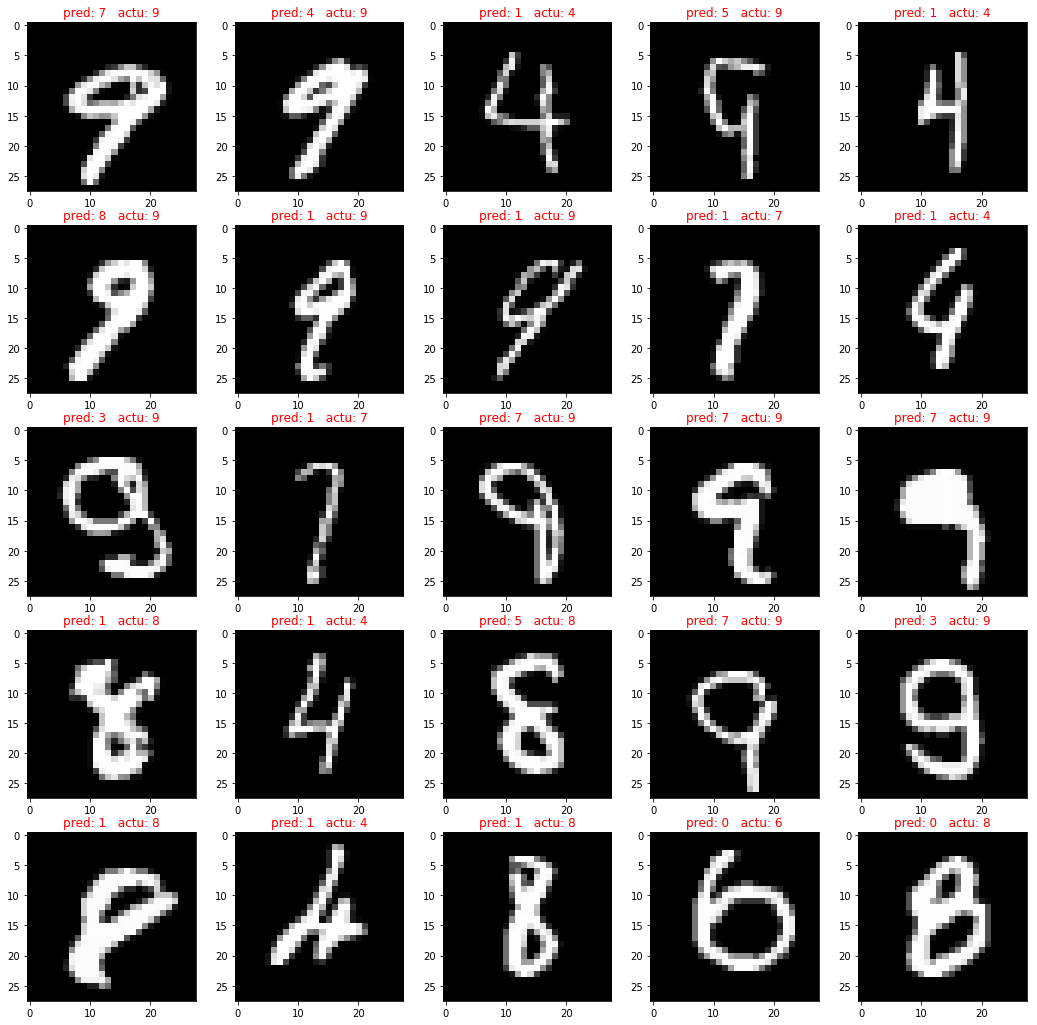

In [160]:
#Plotting misclassified examples
plt.figure(figsize=(18,18))
k = 0
for i in range(len(X_test)):
  if (y_pred_label[i] != y_test_label[i]):
    ax = plt.subplot(5,5,k+1)
    ax.set_title("pred: {}   actu: {}".format(y_pred_label[i], y_test_label[i]), color='r')
    plt.imshow(np.reshape(X_test[i], (28,28)), cmap=plt.cm.gray)
    k += 1
  if k>24:
    break

# Old stuff

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.0593689e-17 6.3046323e-17 8.9005447e-13 1.8406407e-10 8.0754371e-19
  8.0671096e-15 1.1510667e-24 1.0000000e+00 2.1262439e-10 2.7205176e-11]
 [2.5421015e-15 5.1460576e-12 1.0000000e+00 1.7606363e-12 6.3726551e-23
  3.3248325e-16 4.4326671e-09 1.8222993e-27 1.8873889e-12 3.6800765e-21]
 [3.7568029e-08 9.9987435e-01 6.9531761e-06 6.3134886e-10 9.9738187e-05
  5.2485571e-08 1.0483473e-07 1.0138228e-06 1.7757657e-05 1.9014761e-10]
 [1.0000000e+00 2.2739057e-15 6.6718070e-10 5.6225624e-15 4.5025926e-16
  2.7407175e-13 1.3530634e-09 3.9892802e-13 5.8574483e-14 4.0855683e-12]
 [1.0115652e-12 6.9521903e-14 1.3467061e-13 1.9833676e-13 9.9999976e-01
  4.2785103e-16 1.6022580e-12 5.5436229e-11 6.7551126e-10 2.2112354e-07]
 [2.3979660e-10 9.9982810e-01 3.5553690e-08 3.5910691e-11 1.0332796e-05
  1.4169725e-10 2.0029900e-11 1.5314015e-04 8.3647601e-06 3.8377021e-10]
 [1.4182455e-19 9.8074493e-11 5.7774190e-09 2.3251079e-13 9.9966061e-01
  6.0978769e-09 2.3871165e-16 2.2344653e-09 3.3876873e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

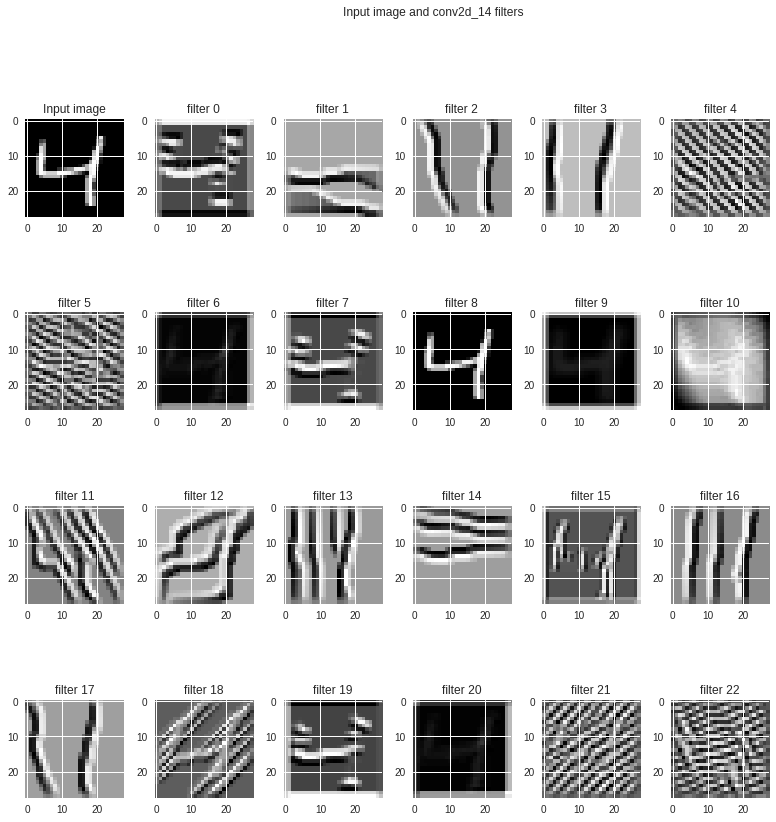

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()